In [19]:
from sensitivity_utilities import *

In [20]:
## load the data dictionary file (its usually of the form results_dic[rbead][sep][height][yuklambda])

res_dict_side_by_side = pkl.load( open('/home/analysis_user/Results/Sensitivity/rbead_2.4e-06_sep_7.5e-06_height_0.p', 'rb'))
#res_dict_side_by_side = pkl.load( open('/home/analysis_user/Results/Sensitivity/rbead_2.4e-06_sep_2.5e-06_height_0.p', 'rb'))


In [21]:
## initate a few values in order to do diagnostics
int_time = 1 # keep that 1 for now
alpha = 1 # alpha to scale the yukawa force
sampling_frequency = 5000 # should be 5000 
time = np.arange(0,int_time,1/sampling_frequency) # make a time array
separation = 7.5e-6 # separation is set by the file you load TODO automatize
pos_x = res_dict_side_by_side["posvec"] # get the position of the bead from the dictionary

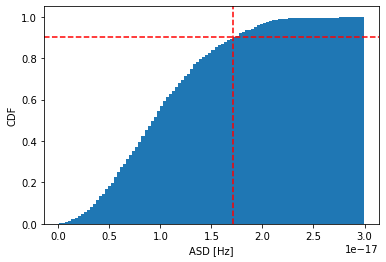

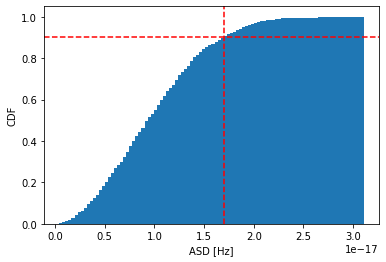

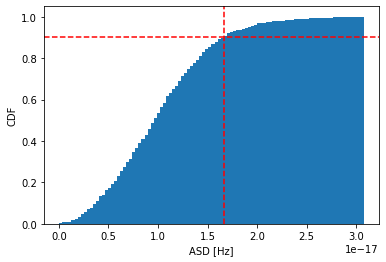

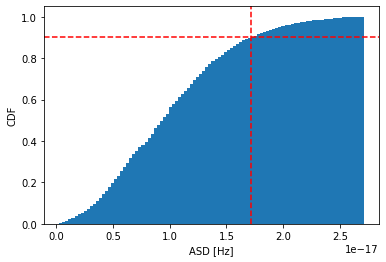

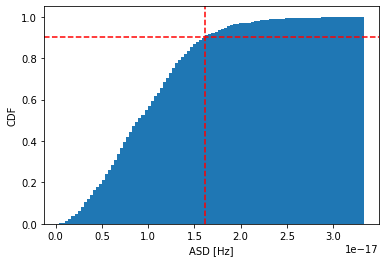

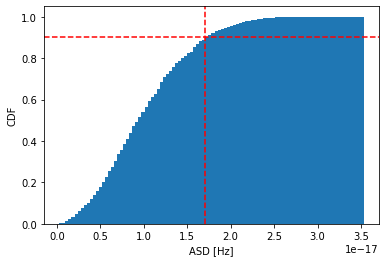

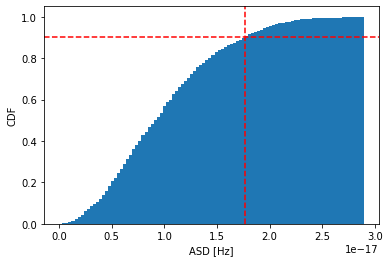

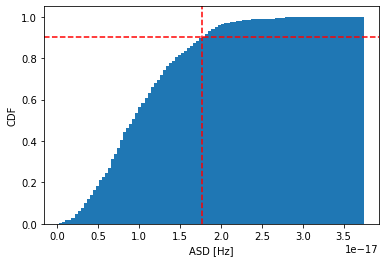

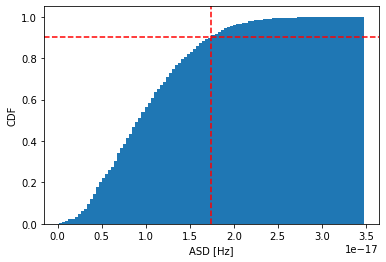

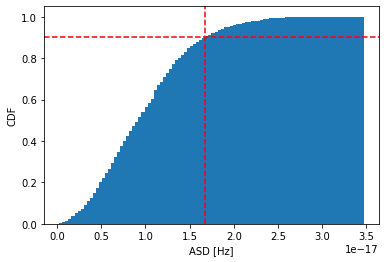

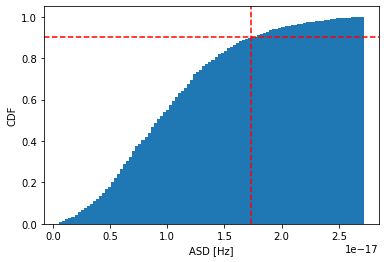

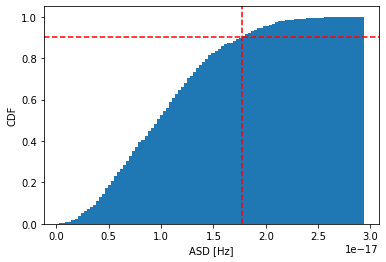

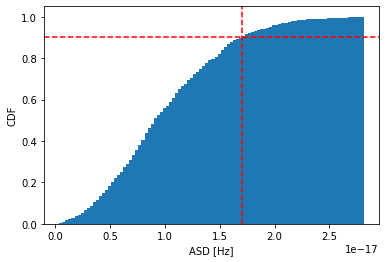

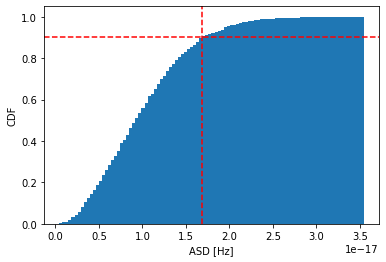

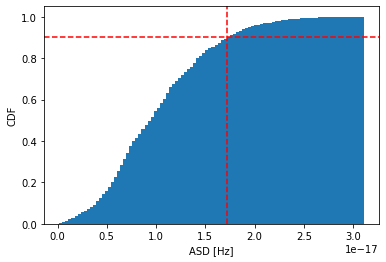

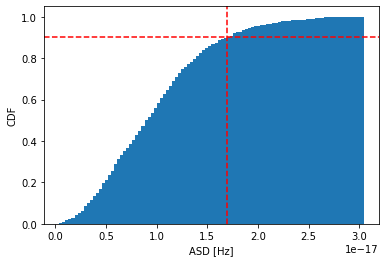

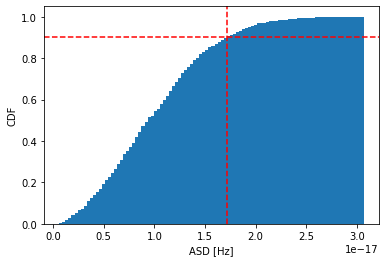

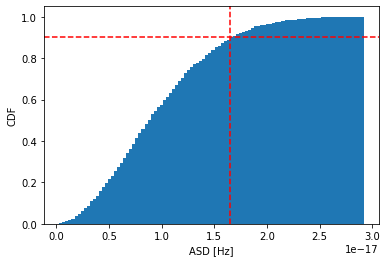

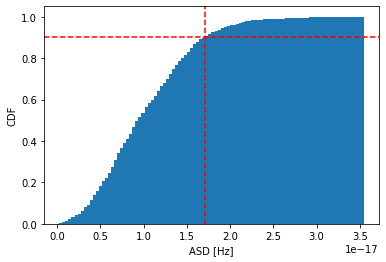

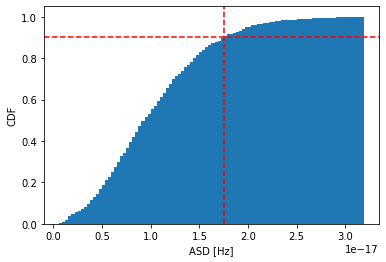

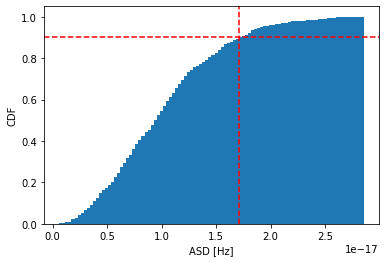

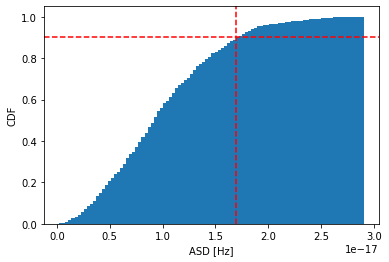

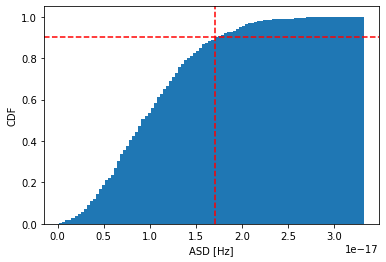

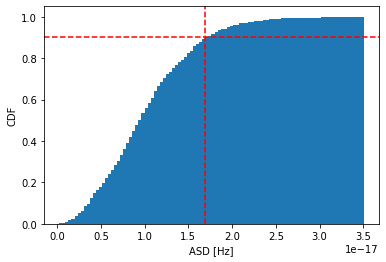

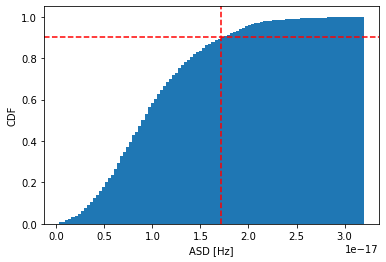

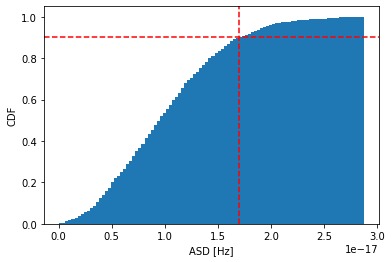

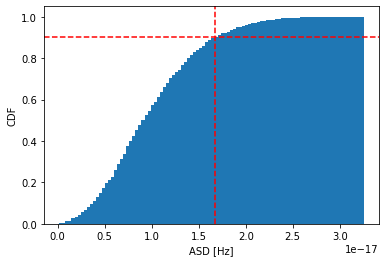

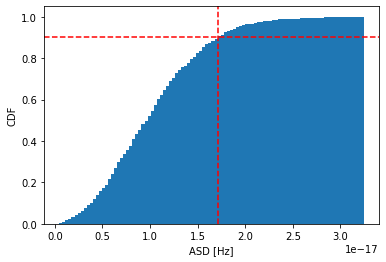

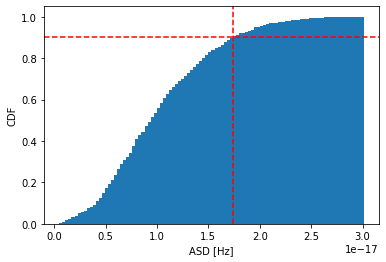

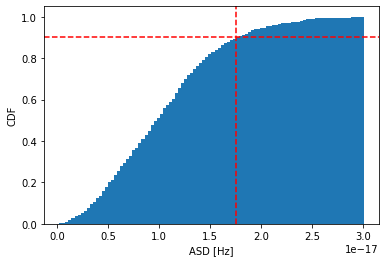

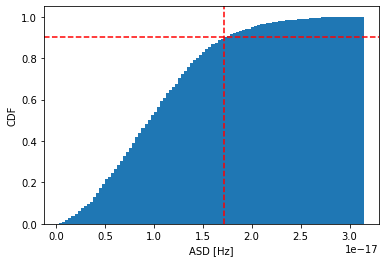

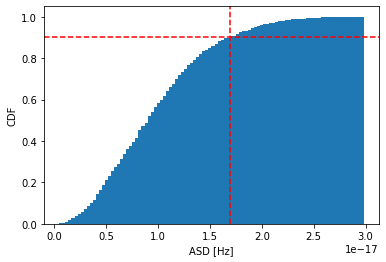

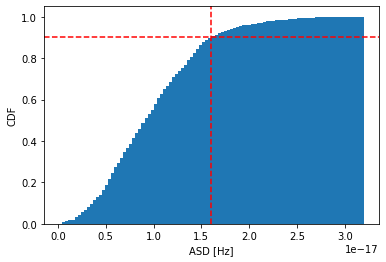

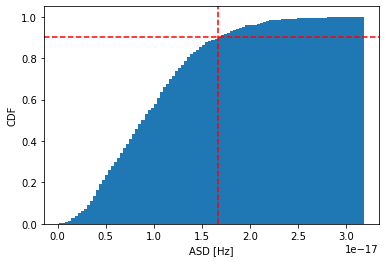

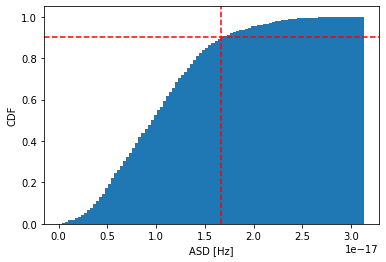

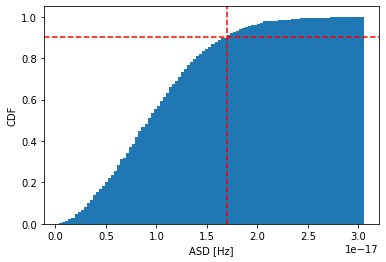

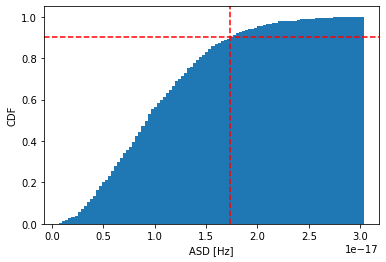

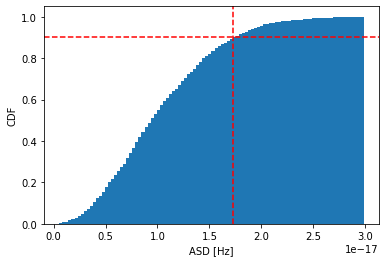

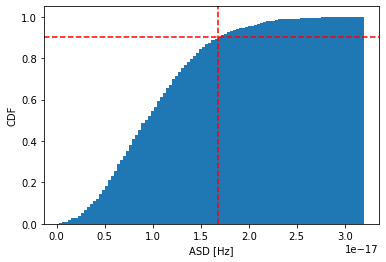

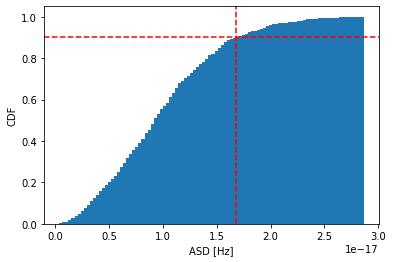

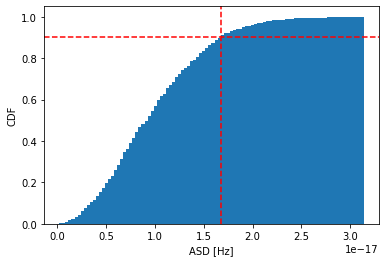

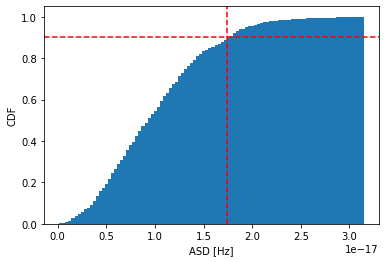

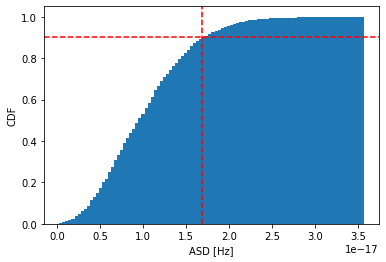

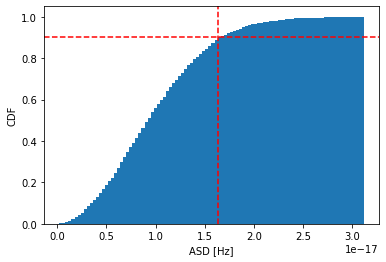

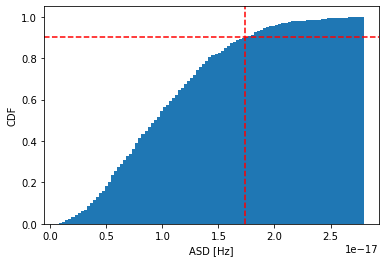

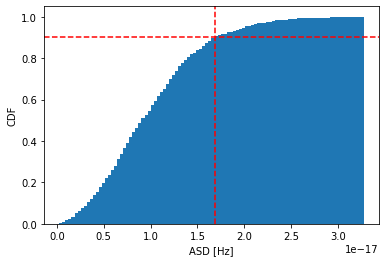

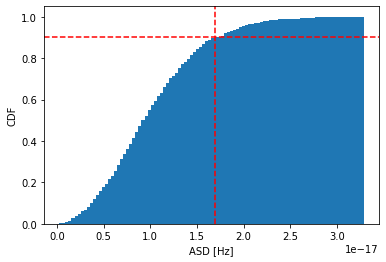

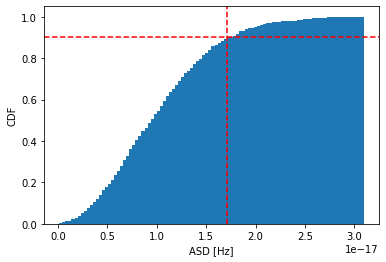

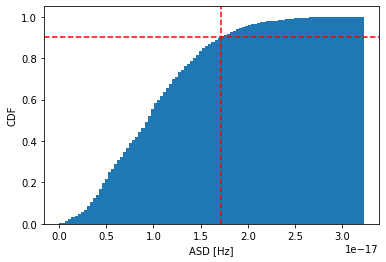

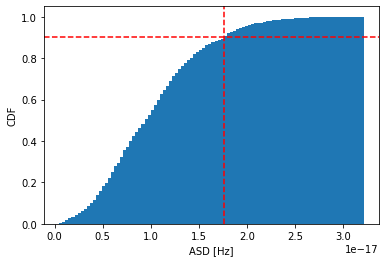

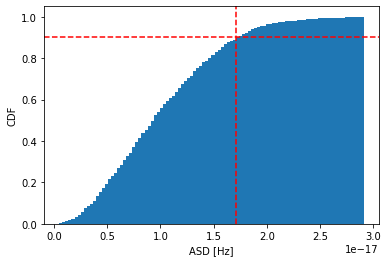

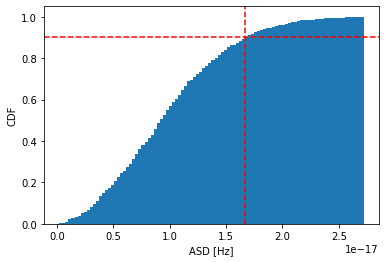

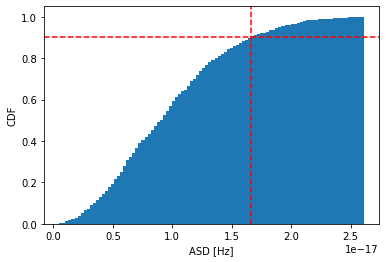

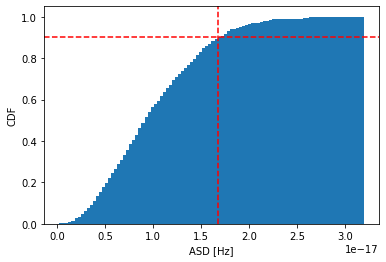

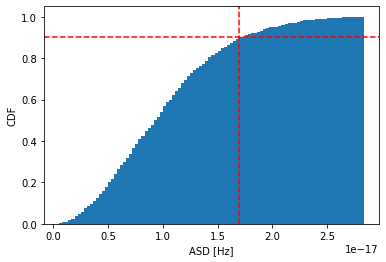

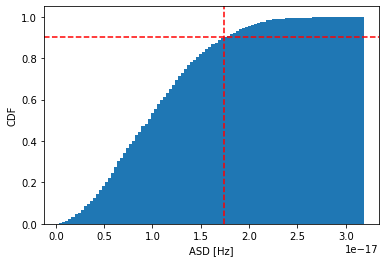

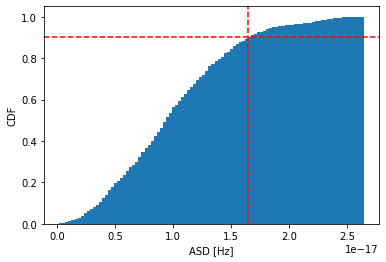

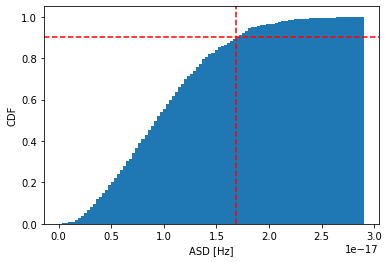

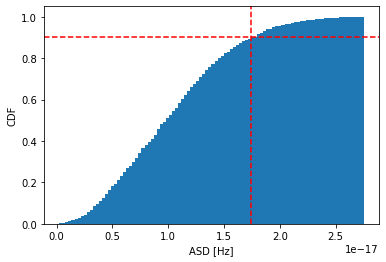

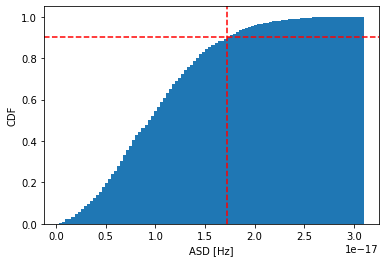

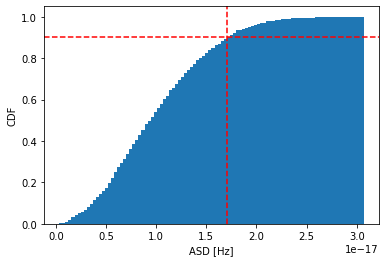

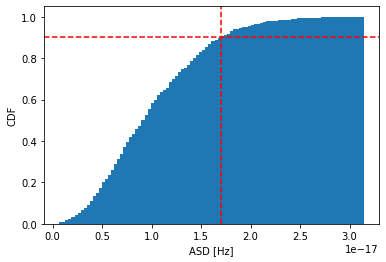

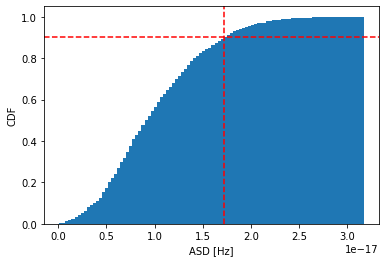

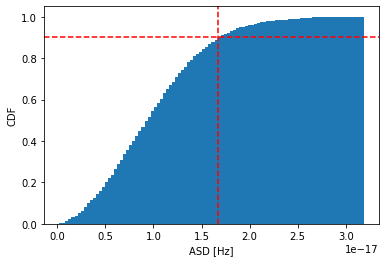

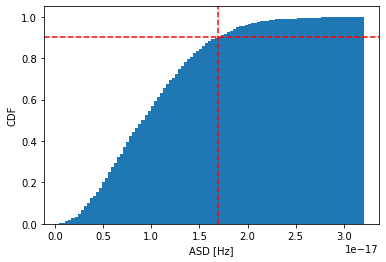

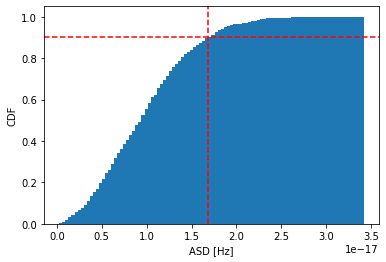

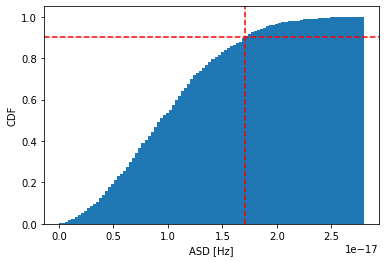

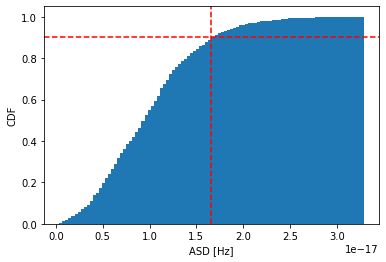

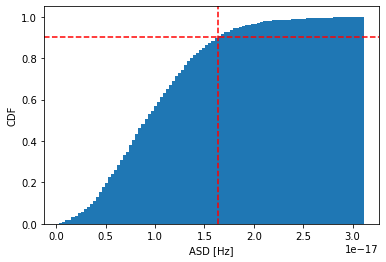

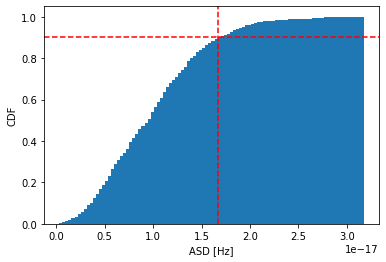

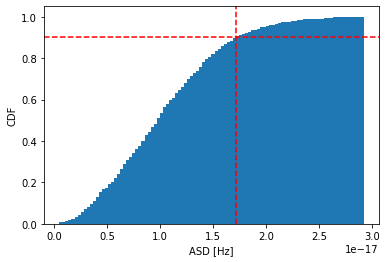

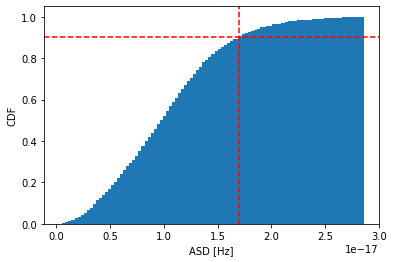

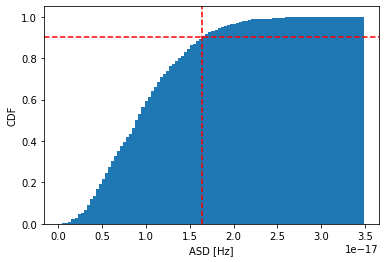

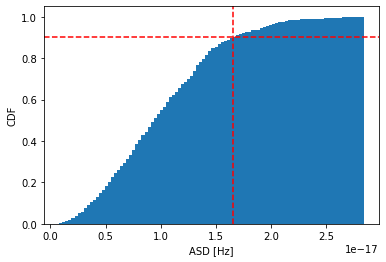

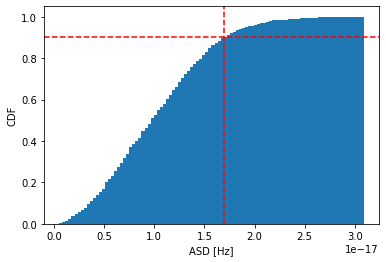

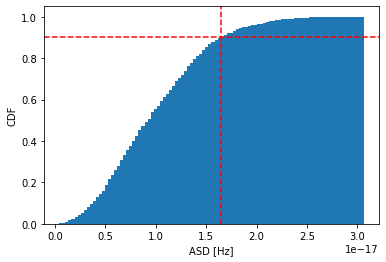

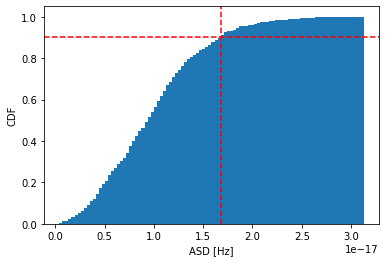

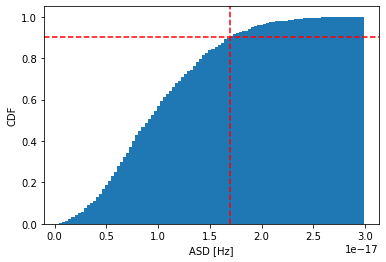

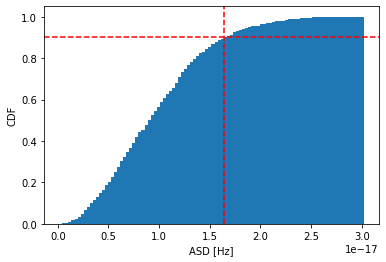

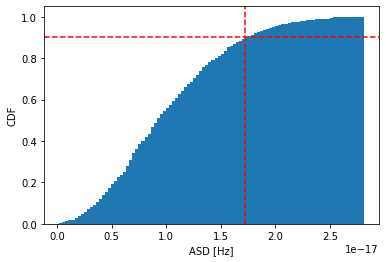

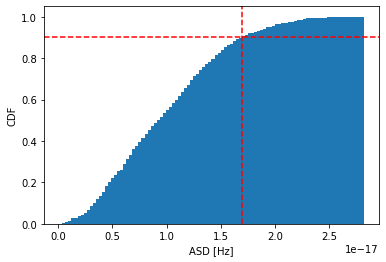

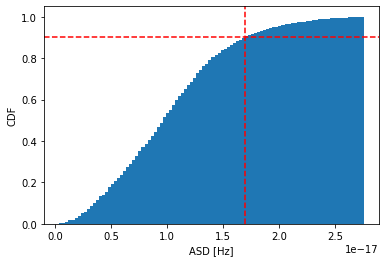

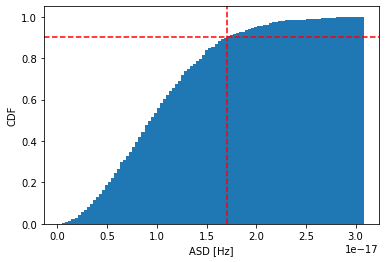

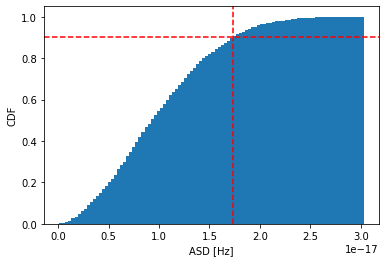

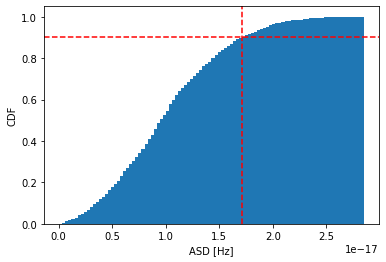

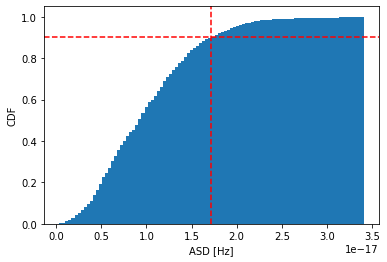

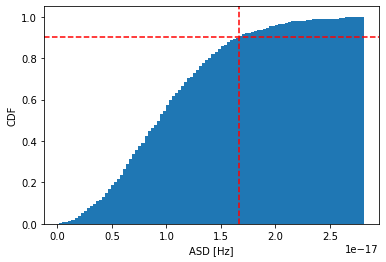

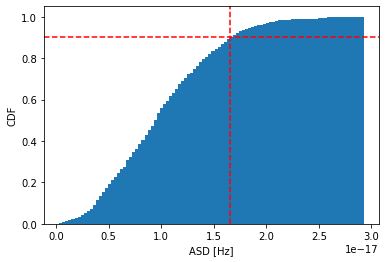

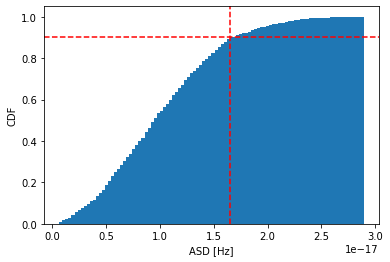

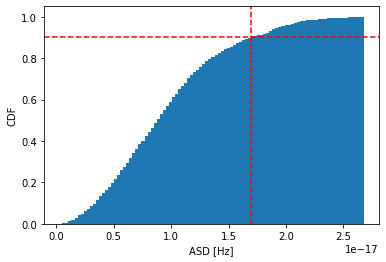

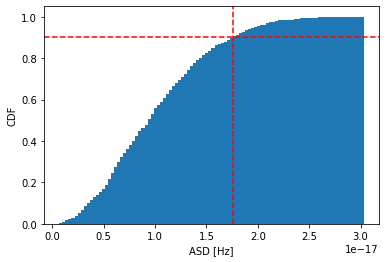

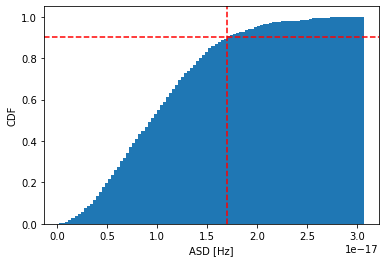

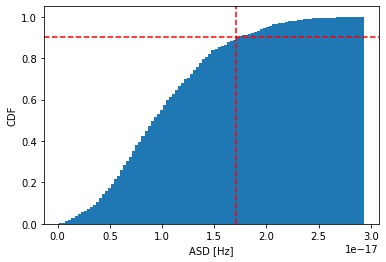

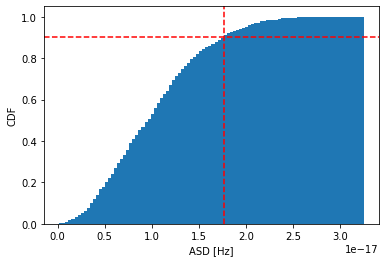

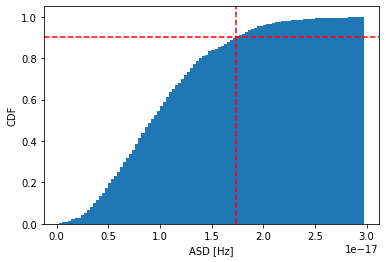

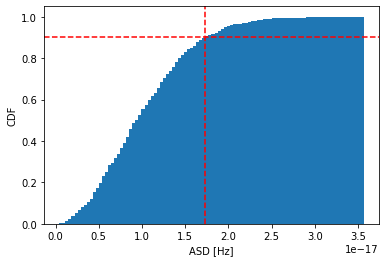

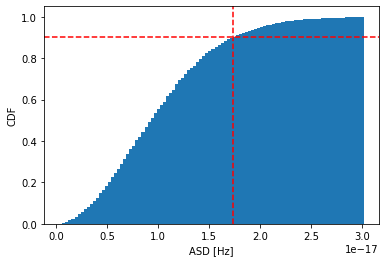

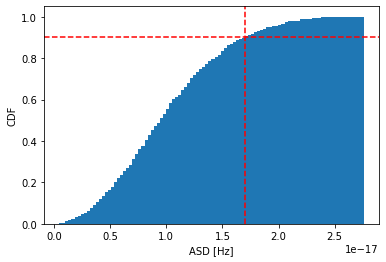

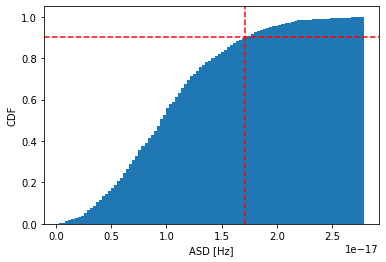

In [22]:
### get noise limit list
frequency = 13
noise_floor = 56.5e-17
no_harmonics = np.arange(1,100,1)
noise_resp_list=[]
limit_list=[]
noise_resp_per_harmonic =0
for k in np.arange(0,1000,1):    
    noise_resp_list.append(noise_response_per_harmonics(no_harmonics,frequency,noise_floor))
noise_resp_per_harmonic = np.stack(np.sqrt(noise_resp_list), axis=1)
for j in no_harmonics-1:
    limit_list.append(fraction_of_histo(noise_resp_per_harmonic[j],bins=100,intervall=0.9))
cumsum_signal =[]
cumsum_noise = np.cumsum(limit_list)    

In [26]:
num_cores = 24
def alpha_response(alpha):
    response_list=[]
    for k in np.arange(0,5000,1):
        response_list.append(measurement_response_harmonics(alpha=alpha,int_time=1,fs=5000,pos_vec=pos_x,force_vec=force_x_yuk,stroke=300e-6,frequency=frequency,noise_floor=noise_floor,no_harmonics=no_harmonics,plot=False,manual=False))
    signal_resp_per_harmonic = np.stack(np.sqrt(response_list), axis=1)
    return np.mean(signal_resp_per_harmonic)

In [28]:
no_harmonics = [6]
alpha_list=[]
lambda_list=[]
lambda_yuk_vals= np.logspace(-6.3, -3, 100)
lambda_yuk_vals = lambda_yuk_vals[::-1]

for lambda_yuk in tqdm(lambda_yuk_vals[:]):
    #print(lambda_yuk)
    signal_list=[]
    alpha_list=np.geomspace(1e6,1e13,250)
    force_x_yuk = res_dict_side_by_side[2.4e-6][separation][0][lambda_yuk][3] # force by the yukawa potential
    alpha_result = Parallel(n_jobs=num_cores)(delayed(alpha_response)(alpha) for alpha in alpha_list)
    lambda_list.append(alpha_list[next(x[0] for x in enumerate(alpha_result) if x[1] > limit_list[2])])
    

    


  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: object of too small depth for desired array

In [ ]:
plt.plot(lambda_yuk_vals[:len(lambda_list)]/1e-6,lambda_list)
plt.yscale("log")
plt.xscale("log")
